In [1]:
pip install pandas requests matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Brian\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

#

def fetch_stock_data(stock_symbol, api_key):
    url = "https://yfapi.net/v6/finance/quote"
    querystring = {"symbols": stock_symbol}    
    headers = {
        "x-api-key": api_key
    }
    response = requests.request("GET", url, headers=headers, params=querystring)

    if response.status_code == 200:
        return response.json()
    else:
            print(f"Error: Unable to fetch data for {stock_symbol}. Status Code: {response.status_code}")
            return None

In [3]:
def fetch_trending_stocks(api_key):
    url = "https://yfapi.net/v1/finance/trending/US"
    headers = {'x-api-key': api_key}
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: Unable to fetch trending stocks. Status Code: {response.status_code}")
        return None

In [4]:
def save_to_csv(df, filename):
    df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

In [5]:
def plot_historical_prices(stock_symbol, api_key):
    url = f"https://yfapi.net/v8/finance/chart/{stock_symbol}?range=5d&interval=1d"
    headers = {'x-api-key': api_key}
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        data = response.json()
        timestamps = data['chart']['result'][0]['timestamp']
        highs = data['chart']['result'][0]['indicators']['quote'][0]['high']

        # Plotting the highest prices over the past 5 days
        plt.plot(timestamps, highs, marker='o')
        plt.title(f"{stock_symbol} - Highest Prices Over Last 5 Days")
        plt.xlabel("Timestamp")
        plt.ylabel("Price")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Error: Unable to fetch historical data for {stock_symbol}. Status Code: {response.status_code}")


Enter a stock ticker symbol (e.g., AAPL):  aapl


Ticker: AAPL
Full Name: Apple Inc.
Current Market Price: $227.79
Target Mean Price: $N/A
52 Week High: $237.23
52 Week Low: $164.08
Trending Stocks: NIO, TSLA, IONQ, HOOD, RKLB
Data saved to AAPL_data.csv


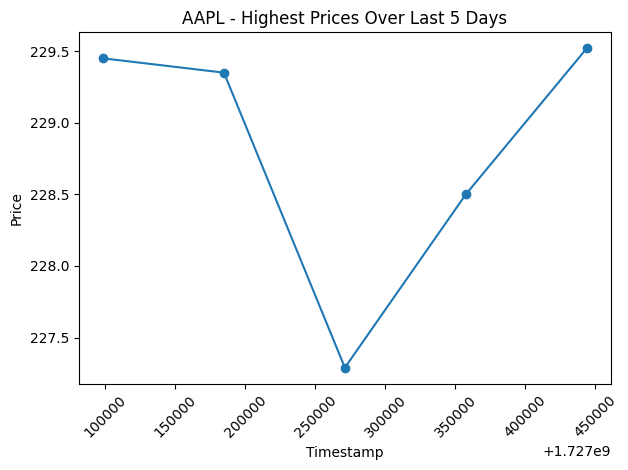

In [6]:
def main():
    # API Key
    api_key = "HWwpGorvXv6T5R8GzkjIB8C55Nqw0OGq5ic18fAj"

    # Take user input for stock symbol
    stock_symbol = input("Enter a stock ticker symbol (e.g., AAPL): ").strip().upper()

    # Fetch stock data
    stock_data = fetch_stock_data(stock_symbol, api_key)
    
    if stock_data and stock_data['quoteResponse']['result']:
        # Extract relevant data
        stock_info = stock_data['quoteResponse']['result'][0]
        ticker = stock_info.get('symbol', 'N/A')
        full_name = stock_info.get('longName', 'N/A')
        current_price = stock_info.get('regularMarketPrice', 'N/A')
        target_mean_price = stock_info.get('targetMeanPrice', 'N/A')
        week_52_high = stock_info.get('fiftyTwoWeekHigh', 'N/A')
        week_52_low = stock_info.get('fiftyTwoWeekLow', 'N/A')

        # Print the stock data
        print(f"Ticker: {ticker}")
        print(f"Full Name: {full_name}")
        print(f"Current Market Price: ${current_price}")
        print(f"Target Mean Price: ${target_mean_price}")
        print(f"52 Week High: ${week_52_high}")
        print(f"52 Week Low: ${week_52_low}")

        # Fetch trending stocks
        trending_data = fetch_trending_stocks(api_key)
        if trending_data and trending_data['finance']['result']:
            trending_stocks = [stock['symbol'] for stock in trending_data['finance']['result'][0]['quotes'][:5]]
            print(f"Trending Stocks: {', '.join(trending_stocks)}")

        # Create a DataFrame and save to CSV
        data = {
            "Ticker": [ticker],
            "Full Name": [full_name],
            "Current Price": [current_price],
            "Target Mean Price": [target_mean_price],
            "52 Week High": [week_52_high],
            "52 Week Low": [week_52_low]
        }
        df = pd.DataFrame(data)
        save_to_csv(df, f"{stock_symbol}_data.csv")

        # Plot historical prices for the bonus task
        plot_historical_prices(stock_symbol, api_key)
    else:
        print(f"Error: No data found for {stock_symbol}. Please check the symbol and try again.")

if __name__ == "__main__":
    main()